# DATA 

In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
plt.rc('font',size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df1=pd.read_csv('/Users/ghanishtaggarwal/Desktop/BA/Earthquake1.csv')
df2=pd.read_csv('/Users/ghanishtaggarwal/Desktop/BA/Earthquake2.csv')

In [3]:
df=pd.concat([df2,df1],axis=1).drop_duplicates().reset_index(drop=True)

In [8]:
df.head()

Earthquake No.   Time Series Avalability           Station Name Record No      Date      Time Unnamed: 6  Latitude  Longitude Reference Station Code    Province Fault Type  Earthquake No.  Epicentral Distance (KM)  Moment Magnitude (MW)  Depth (km)  Effective duration (s) L  Vs30 (m/s)  Eq.1     Eq.2  Eq.3    Eq.4    Eq.5   Eq.6   Eq.7  Eq.8  Eq.9  Eq.10  Actual horizontal peak ground acceleration in g Sharjah (UOSS)  target_id
0              1.0                      1.0     Tooshk-e-Ab-e-Sard   4836/01  26/05/09  11:52:48         PM     33.94      48.60      BHRC          TOA    Lorestan          R             1.0                      19.0                    4.6        22.0                      2.17       891.0   0.04   30.16  0.01   63.44  192.05  58.66  23.57  0.15  0.04   0.09                                           0.442468                     0.0
1              2.0                      1.0  Shahid AbbasPoor Dam3      4929  04/10/09   9:50:50         PM     31.94      49.42      BHRC          1KR   khuzestan         SS             2.0                      21.0                    5.1        10.0                     11.60         NaN    NaN   42.85   NaN     NaN  270.19    NaN  40.24  0.67  0.05    NaN                                           0.139353                     0.0
2              3.0                      1.0               Dinevar1      4854  13/10/09  12:54:27         AM     35.05      46.93      BHRC          KRH  kernanshah          R             3.0                      70.0                    5.1        10.0                     14.15       514.0   0.02  134.34  0.01   31.35   66.41  21.37  12.02  0.13  0.02   0.03                                           0.526330                     0.0
3              4.0                      1.0       Hosseiniyeh Olya   4942/01  23/02/10  10:25:54         AM     32.57      48.38      BHRC          HSN   khuzestan         SS             4.0                      16.0                    5.4        16.0                      5.46       582.0   0.09   39.98  0.05  140.46  385.59  91.89  73.37  2.33  0.08   0.24                                           0.690756                     0.0
4              5.0                      1.0                 Dalaki      4957  14/05/10   6:49:56         PM     29.42      51.65      BHRC          DLk     bushehr         SS             5.0                      35.0                    5.1         9.0                       NaN       971.0   0.03   68.46  0.01   51.18  182.10  48.26  24.73  0.36  0.03   0.06                                           0.330673                     0.0

In [9]:
df.rename(columns={'Unnamed: 17':'target_id'},inplace= True)

In [10]:
df['Fault Type'].value_counts()

SS    76
R     51
Name: Fault Type, dtype: int64

In [11]:
df['Time Series Avalability'].value_counts()

1.0    89
0.0    41
Name: Time Series Avalability, dtype: int64

In [12]:
missing_df=pd.DataFrame()
missing_df['cols']=df.isnull().sum().keys()
missing_df['values']=df.isnull().sum().values.tolist()
missing_df[missing_df['values']>0]

cols  values
0                                     Earthquake No.        1
1                             Time Series Avalability       1
2                                        Station Name       1
3                                           Record No       1
4                                                Date       1
5                                                Time       1
6                                          Unnamed: 6       1
7                                            Latitude       1
8                                           Longitude       1
9                                           Reference       1
10                                       Station Code       1
11                                           Province       1
12                                         Fault Type       4
13                                     Earthquake No.       1
14                           Epicentral Distance (KM)       1
15                              Moment Magnitude (MW)       1
16                                         Depth (km)       1
17                           Effective duration (s) L      41
18                                         Vs30 (m/s)      42
19                                              Eq.1       43
20                                               Eq.2       1
21                                               Eq.3      43
22                                               Eq.4      43
23                                               Eq.5       1
24                                               Eq.6      43
25                                               Eq.7       1
26                                               Eq.8       1
27                                               Eq.9       1
28                                              Eq.10      43
29  Actual horizontal peak ground acceleration in ...      42
30                                          target_id       1

In [13]:
#aggregation on the basis of Fault Type
df['avg_epicentral_distance'] = df.groupby('Fault Type')['Epicentral Distance (KM)'].transform('mean')
df['avg_MW'] = df.groupby('Fault Type')['Moment Magnitude (MW)'].transform('mean')
df['avg_Depth'] = df.groupby('Fault Type')['Depth (km)'].transform('mean')
df['avg_effective_duration'] = df.groupby('Fault Type')['Effective duration (s) L'].transform('mean')
df['avg_vs'] = df.groupby('Fault Type')['Vs30 (m/s)'].transform('mean')

In [14]:
#aggregation on the basis of Refernce
df['avg_epicentral_distance_r'] = df.groupby('Reference')['Epicentral Distance (KM)'].transform('mean')
df['avg_MW_r'] = df.groupby('Reference')['Moment Magnitude (MW)'].transform('mean')
df['avg_Depth_r'] = df.groupby('Reference')['Depth (km)'].transform('mean')
df['avg_effective_duration_r'] = df.groupby('Reference')['Effective duration (s) L'].transform('mean')
df['avg_vs_r'] = df.groupby('Reference')['Vs30 (m/s)'].transform('mean')

In [15]:
#aggregation on the basis of Station Code
df['avg_epicentral_distance_sc'] = df.groupby('Station Code')['Epicentral Distance (KM)'].transform('mean')
df['avg_MW_sc'] = df.groupby('Station Code')['Moment Magnitude (MW)'].transform('mean')
df['avg_Depth_sc'] = df.groupby('Station Code')['Depth (km)'].transform('mean')
df['avg_effective_duration_sc'] = df.groupby('Station Code')['Effective duration (s) L'].transform('mean')
df['avg_vs_sc'] = df.groupby('Station Code')['Vs30 (m/s)'].transform('mean')

In [16]:
#aggregation on the basis of Province
df['avg_epicentral_distance_p'] = df.groupby('Province')['Epicentral Distance (KM)'].transform('mean')
df['avg_MW_p'] = df.groupby('Province')['Moment Magnitude (MW)'].transform('mean')
df['avg_Depth_p'] = df.groupby('Province')['Depth (km)'].transform('mean')
df['avg_effective_duration_p'] = df.groupby('Province')['Effective duration (s) L'].transform('mean')
df['avg_vs_p'] = df.groupby('Province')['Vs30 (m/s)'].transform('mean')

In [19]:
df=df.drop(['Station Name','Record No','Date','Time','Unnamed: 6','Reference','Station Code','Province'],axis=1)

In [20]:
df.head()

Earthquake No.   Time Series Avalability  Latitude  Longitude Fault Type  Earthquake No.  Epicentral Distance (KM)  Moment Magnitude (MW)  Depth (km)  Effective duration (s) L  Vs30 (m/s)  Eq.1     Eq.2  Eq.3    Eq.4    Eq.5   Eq.6   Eq.7  Eq.8  Eq.9  Eq.10  Actual horizontal peak ground acceleration in g Sharjah (UOSS)  target_id  avg_epicentral_distance    avg_MW  avg_Depth  avg_effective_duration      avg_vs  avg_epicentral_distance_r  avg_MW_r  avg_Depth_r  avg_effective_duration_r  \
0              1.0                      1.0     33.94      48.60          R             1.0                      19.0                    4.6        22.0                      2.17       891.0   0.04   30.16  0.01   63.44  192.05  58.66  23.57  0.15  0.04   0.09                                           0.442468                     0.0                31.745098  5.101961  13.980392                9.022121  783.644444                  28.638462  5.052308    13.723077                  9.044111   
1              2.0                      1.0     31.94      49.42         SS             2.0                      21.0                    5.1        10.0                     11.60         NaN    NaN   42.85   NaN     NaN  270.19    NaN  40.24  0.67  0.05    NaN                                           0.139353                     0.0                25.894737  4.993421  12.868421                8.794545  841.636364                  28.638462  5.052308    13.723077                  9.044111   
2              3.0                      1.0     35.05      46.93          R             3.0                      70.0                    5.1        10.0                     14.15       514.0   0.02  134.34  0.01   31.35   66.41  21.37  12.02  0.13  0.02   0.03                                           0.526330                     0.0                31.745098  5.101961  13.980392                9.022121  783.644444                  28.638462  5.052308    13.723077                  9.044111   
3              4.0                      1.0     32.57      48.38         SS             4.0                      16.0                    5.4        16.0                      5.46       582.0   0.09   39.98  0.05  140.46  385.59  91.89  73.37  2.33  0.08   0.24                                           0.690756                     0.0                25.894737  4.993421  12.868421                8.794545  841.636364                  28.638462  5.052308    13.723077                  9.044111   
4              5.0                      1.0     29.42      51.65         SS             5.0                      35.0                    5.1         9.0                       NaN       971.0   0.03   68.46  0.01   51.18  182.10  48.26  24.73  0.36  0.03   0.06                                           0.330673                     0.0                25.894737  4.993421  12.868421                8.794545  841.636364                  28.638462  5.052308    13.723077                  9.044111   

     avg_vs_r  avg_epicentral_distance_sc  avg_MW_sc  avg_Depth_sc  avg_effective_duration_sc  avg_vs_sc  avg_epicentral_distance_p  avg_MW_p  avg_Depth_p  avg_effective_duration_p    avg_vs_p  
0  812.314607                        19.0        4.6          22.0                       2.17      891.0                       29.0  4.333333         16.0                     2.795  756.000000  
1  812.314607                        21.0        5.1          10.0                      11.60        NaN                       18.5  5.250000         13.0                     8.530  582.000000  
2  812.314607                        70.0        5.1          10.0                      14.15      514.0                       70.0  5.100000         10.0                    14.150  514.000000  
3  812.314607                        16.0        5.4          16.0                       5.46      582.0                       18.5  5.250000         13.0                     8.530  582.000000  
4  812.314607                        35.0    

In [21]:
df['Fault Type']=df['Fault Type'].map({'R': 1, 'SS': 0})

In [22]:
df1=df.drop(['Earthquake No.','Actual horizontal peak ground acceleration in g Sharjah (UOSS)'],axis=1)

In [23]:
#Scaling is performed
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler()
scaled = scaler.fit_transform(df1)

In [24]:
scaled=pd.DataFrame(scaled,columns=df1.columns)

In [25]:
scaled.fillna(scaled.mean(),inplace=True)

In [26]:
scaled.head()

Earthquake No.   Time Series Avalability  Latitude  Longitude  Fault Type  Epicentral Distance (KM)  Moment Magnitude (MW)  Depth (km)  Effective duration (s) L  Vs30 (m/s)  Eq.1       Eq.2      Eq.3      Eq.4      Eq.5      Eq.6      Eq.7      Eq.8      Eq.9     Eq.10  target_id  avg_epicentral_distance  avg_MW  avg_Depth  avg_effective_duration  avg_vs  avg_epicentral_distance_r  avg_MW_r  avg_Depth_r  avg_effective_duration_r  avg_vs_r  avg_epicentral_distance_sc  avg_MW_sc  \
0        -1.000000                      0.0  0.537656  -0.403428         1.0                 -0.080808                 -0.500    1.666667                 -0.630442    0.261972  0.000 -0.249729 -0.500000 -0.217373 -0.182027  0.008171 -0.300858 -0.250000 -0.333333 -0.222222        0.0                      1.0     1.0        1.0                     1.0    -1.0                        0.0       0.0          0.0                       0.0       0.0                   -0.252632  -0.718391   
1        -0.984496                      0.0  0.138653  -0.295320         0.0                  0.000000                  0.125   -0.333333                  0.642592    0.040323  0.375  0.000000  0.386364  0.230786  0.564813  0.216871  0.289178  0.250000  0.000000  0.135101        0.0                      0.0     0.0        0.0                     0.0     0.0                        0.0       0.0          0.0                       0.0       0.0                   -0.168421   0.143678   
2        -0.968992                      0.0  0.759102  -0.623599         1.0                  1.979798                  0.125   -0.333333                  0.986838   -0.800000 -0.500  1.800453 -0.500000 -0.877933 -1.382858 -0.773099 -0.709672 -0.269231 -1.000000 -0.888889        0.0                      1.0     1.0        1.0                     1.0    -1.0                        0.0       0.0          0.0                       0.0       0.0                    1.894737   0.143678   
3        -0.953488                      0.0  0.264339  -0.432432         0.0                 -0.202020                  0.500    0.666667                 -0.186298   -0.608451  1.250 -0.056479  1.500000  1.368053  1.667774  0.704379  1.461818  1.846154  1.000000  1.444444        0.0                      0.0     0.0        0.0                     0.0     0.0                        0.0       0.0          0.0                       0.0       0.0                   -0.378947   0.660920   
4        -0.937984                      0.0 -0.364090  -0.001318         0.0                  0.565657                  0.125   -0.500000                  0.297551    0.487324 -0.250  0.503985 -0.500000 -0.469741 -0.277126 -0.209721 -0.259800 -0.048077 -0.666667 -0.555556        0.0                      0.0     0.0        0.0                     0.0     0.0                        0.0       0.0          0.0                       0.0       0.0                    0.421053   0.143678   

   avg_Depth_sc  avg_effective_duration_sc  avg_vs_sc  avg_epicentral_distance_p  avg_MW_p  avg_Depth_p  avg_effective_duration_p  avg_vs_p  
0      1.583333                  -0.708464   0.269175                   0.411867 -1.442219     0.837132                 -1.807614 -0.031616  
1     -0.416667                   0.605364   0.051916                  -0.700173  0.591680    -0.202066                  0.145597 -0.616853  
2     -0.416667                   0.960641  -0.821997                   4.754119  0.258860    -1.241264                  2.059642 -0.845567  
3      0.583333                  -0.250087  -0.625181                  -0.700173  0.591680    -0.202066                  0.145597 -0.616853  
4     -0.583333                   0.244458   0.500724                   2.953673 -0.110940    -0.894865                  0.140734 -0.003588

In [27]:
scaled['target_id']=df['target_id']
target_col=['target_id']

In [34]:
scaled=scaled.fillna(0)

# MODELLING

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test
train, test = train_test_split(scaled, test_size=0.2, random_state=17)
train_X = train.drop('target_id', axis=1)
train_Y = train['target_id']
test_X = test.drop('target_id', axis=1)
test_Y = test['target_id']

In [36]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization



cols = [column for column in train_X.columns]
def earthquake_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    preds = algorithm.predict(test_X)
    return 
    

In [37]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                          verbose=1, warm_start=False)

In [38]:
logit.fit(train_X, train_Y)
predictions = logit.predict(test_X)

[LibLinear]

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        25
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        27
   macro avg       0.46      0.48      0.47        27
weighted avg       0.85      0.89      0.87        27

Accuracy   Score :  0.8888888888888888
Area under curve :  0.48 



/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

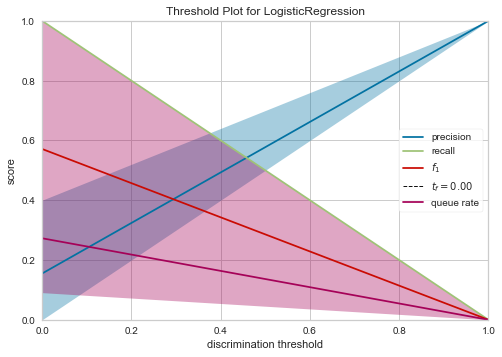

In [40]:
logit_preds = earthquake_prediction(logit, train_X, test_X, train_Y, test_Y,cols, "coefficients", threshold_plot=True)

In [48]:
smote_X=scaled.loc[:,scaled.columns !='target_id']
smote_Y=scaled.loc[:,scaled.columns=='target_id']
cols = [col for col in train.columns if col not in ['target_id']]
from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(smote_X,smote_Y,test_size=0.2,random_state=0)
columns=X_train.columns


os_df1_X,os_df1_y=os.fit_sample(X_train,y_train)
os_df1_X=pd.DataFrame(data=os_df1_X,columns=cols)
os_df1_y=pd.DataFrame(data=os_df1_y,columns=['target_id'])

In [49]:
from imblearn.over_sampling import SMOTE
os_df1_X,os_df1_y= os.fit_sample(train[cols], train['target_id'])
train_osx = pd.DataFrame(data=os_df1_X, columns=cols)
train_osy = pd.DataFrame(data=os_df1_y, columns=target_col)

In [50]:
#smote without train test split on scaled data
from imblearn.over_sampling import SMOTE
train_os_x, train_os_y = os.fit_sample(scaled[cols], scaled['target_id'])
train_osx_scaled = pd.DataFrame(data=train_os_x, columns=cols)
train_osy_scaled = pd.DataFrame(data=train_os_y, columns=target_col)

In [54]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    return algorithm.predict(test_X)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                          n_jobs=-1, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        25
         1.0       0.20      1.00      0.33         2

    accuracy                           0.70        27
   macro avg       0.60      0.84      0.57        27
weighted avg       0.94      0.70      0.77        27

Accuracy Score   :  0.7037037037037037
Area under curve :  0.84


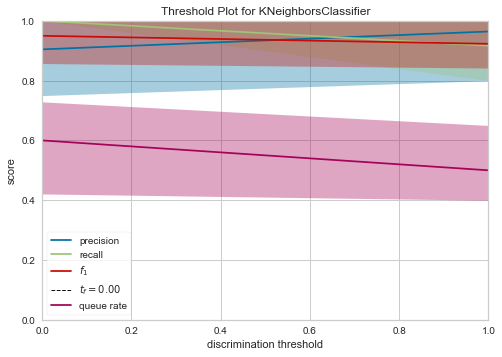

In [58]:
predictions2 = telecom_churn_prediction_alg(knn,os_df1_X, test_X, os_df1_y, test_Y, threshold_plot=True)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(train_osx, train_osy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
predictions = rf.predict(test_X)

In [64]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
features = list(scaled.drop(columns=['target_id']).columns)
import pydot
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_X, train_Y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

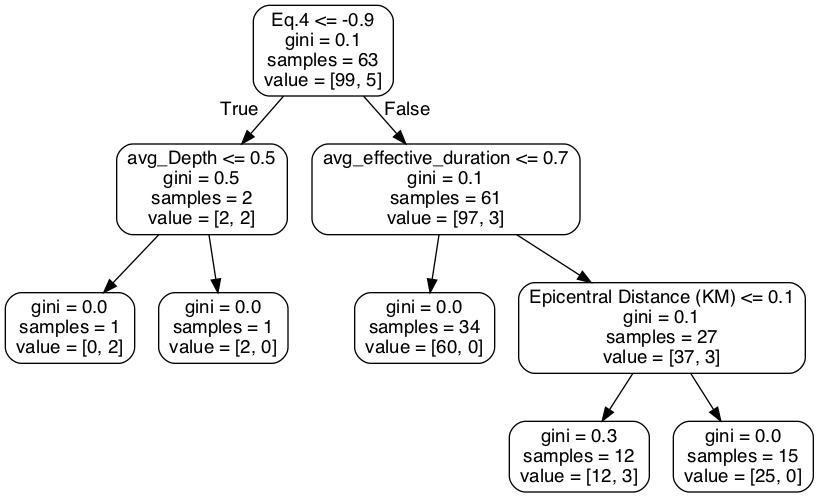

In [65]:
Image('small_tree.png')

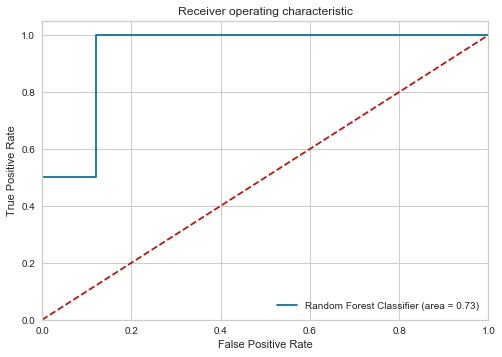

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(test_Y, rf.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, rf.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

In [68]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [69]:
D_train = xgb.DMatrix(train_osx, label=train_osy)
D_test = xgb.DMatrix(test_X, label=test_Y)

In [70]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [71]:
model = xgb.train(param, D_train, steps)

In [72]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
Y_pred = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in Y_pred])

print("Precision = {}".format(precision_score(test_Y, best_preds, average='macro')))
print("Recall = {}".format(recall_score(test_Y, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(test_Y, best_preds)))

Precision = 0.73
Recall = 0.73
Accuracy = 0.9259259259259259


# ENSEMBLE

In [73]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [74]:
kfold = StratifiedKFold(n_splits=10)

In [75]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [76]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_osx, y = train_osy, 
                                      scoring = "f1", cv = kfold, n_jobs=-1))

In [77]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [78]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

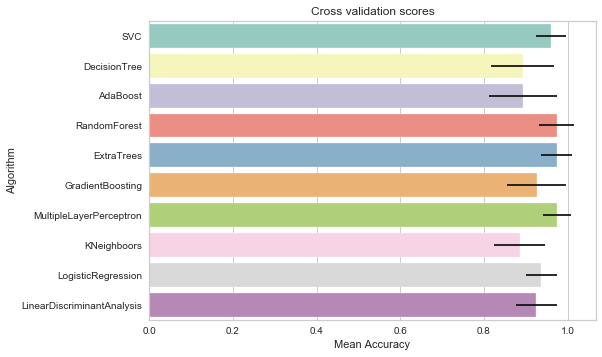

In [79]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [80]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_osx,train_osy)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 552 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.0s finished


In [81]:
gsadaDTC.best_score_

0.9375

In [82]:
#changing kfold to 3
kfold = StratifiedKFold(n_splits=3)

In [83]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= -1, verbose = 1)

gsRFC.fit(train_osx,train_osy)

RFC_best = gsRFC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   16.9s finished


In [84]:
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
gsRFC.best_score_

0.9784783522488439